# RFA-based NN growth experiment (WIP)
# TODO

In [1]:
from experiment import execute_experiment
#from plots import plot_norm_and_alignments_histograms

experiment_results = execute_experiment(
    seed=12345,
    noise_rate=0.15,
    within_cluster_variance=1. / 50.,
    input_dimension=2,
    sample_size=5000,
    batch_size=5000,
    epochs=100,
    learning_rate=0.05,
    hidden_units=2,
    initialization_variance=1 / (32. * 500.),
    runs_per_model=1,
    save_models_path='./models/',
    save_experiments_path='./experiments/',
    #callback=plot_norm_and_alignments_histograms,
    saving_epochs_interval=100
)

In [ ]:
stop

Accuracy: 0.4447999894618988


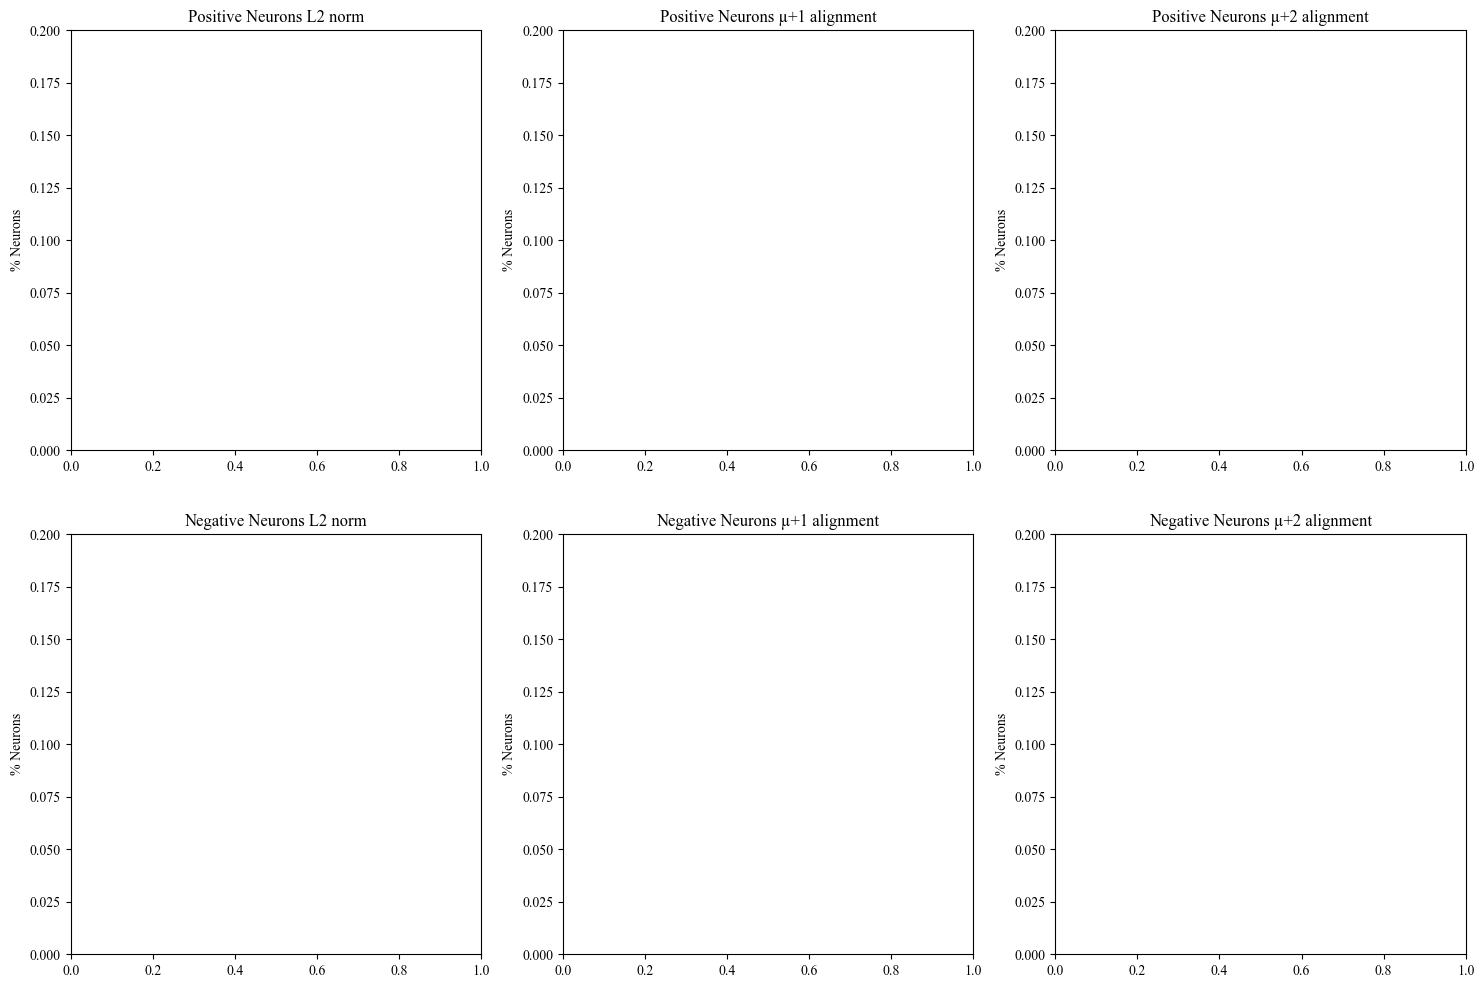

In [2]:
from experiment import PrunableTwoLayerNeuralNet
from plots import plot_samples_and_activation
from settings.noisy_2xor import get_dataloader
from utils.optimization import Accuracy, initialize

initialize(experiment_results['seed'])

data, rotation_matrix = get_dataloader(**experiment_results)
_, (inputs, labels) = next(enumerate(data))

model = PrunableTwoLayerNeuralNet.load('./models/', {**experiment_results, 'run': 0})
model.eval()

print(f'Accuracy: {Accuracy(model(inputs), labels)}')

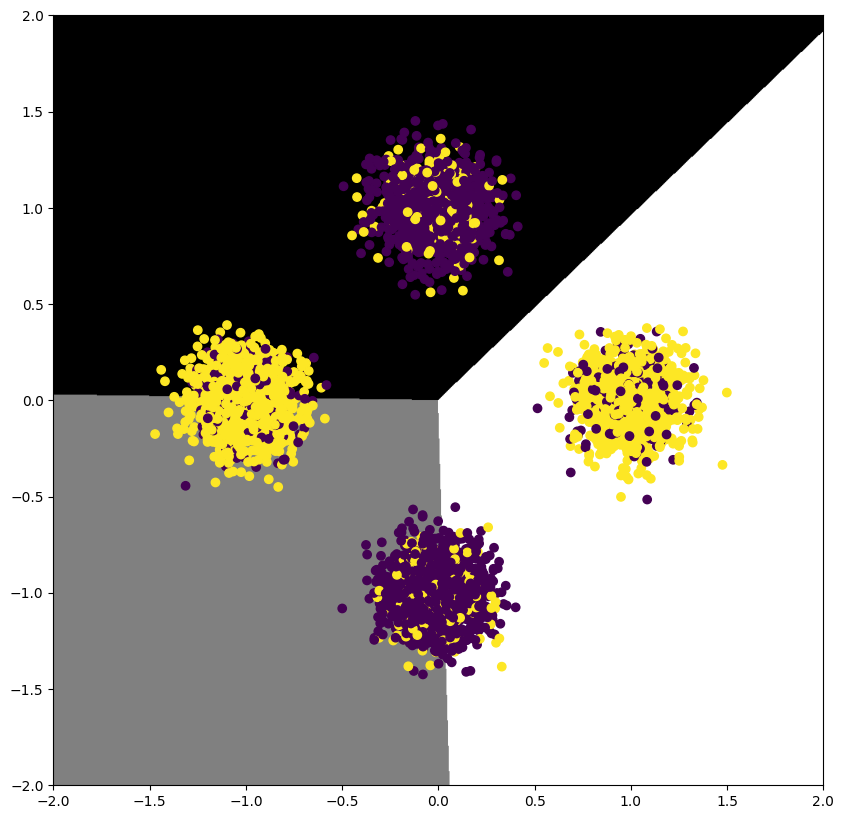

In [3]:
plot_samples_and_activation(inputs, labels, model, rotation_matrix=rotation_matrix, **experiment_results)

In [4]:
pruning_ratio = 0.5
model.prune_weights_by_magnitude(pruning_ratio)

print(f'Accuracy: {Accuracy(model(inputs), labels)}')

Accuracy: 0.4453999996185303


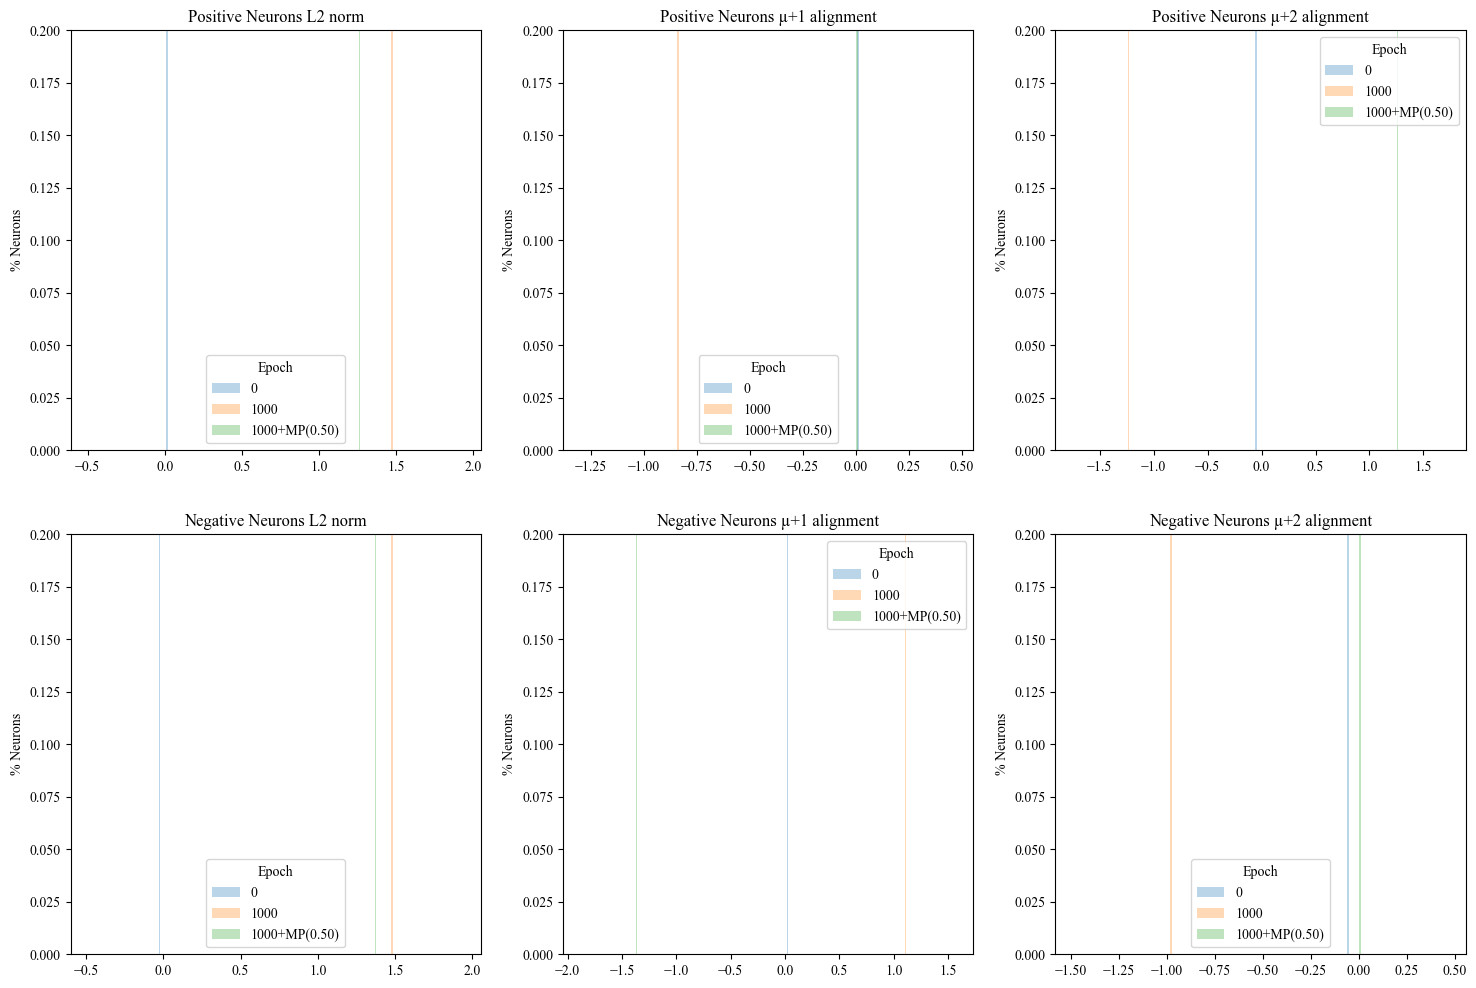

In [5]:
from plots import plot_norm_and_alignments_histograms, fig

plot_norm_and_alignments_histograms(model, epoch=f'{experiment_results["epochs"]}+MP({pruning_ratio:.2f})', **experiment_results)
fig

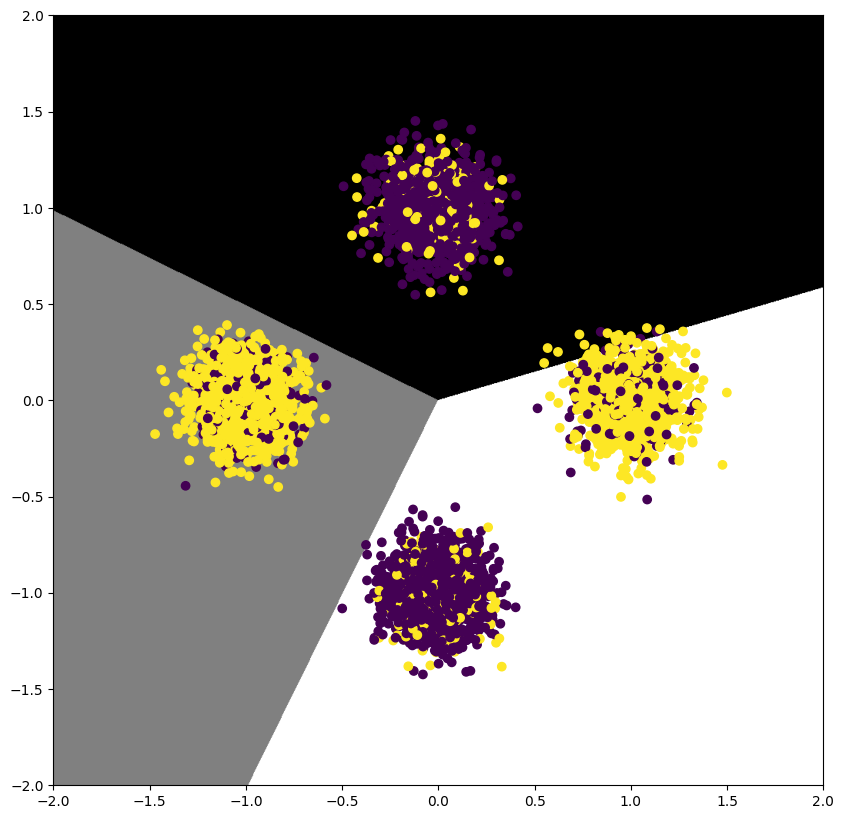

In [6]:
plot_samples_and_activation(inputs, labels, model, rotation_matrix=rotation_matrix, **experiment_results)

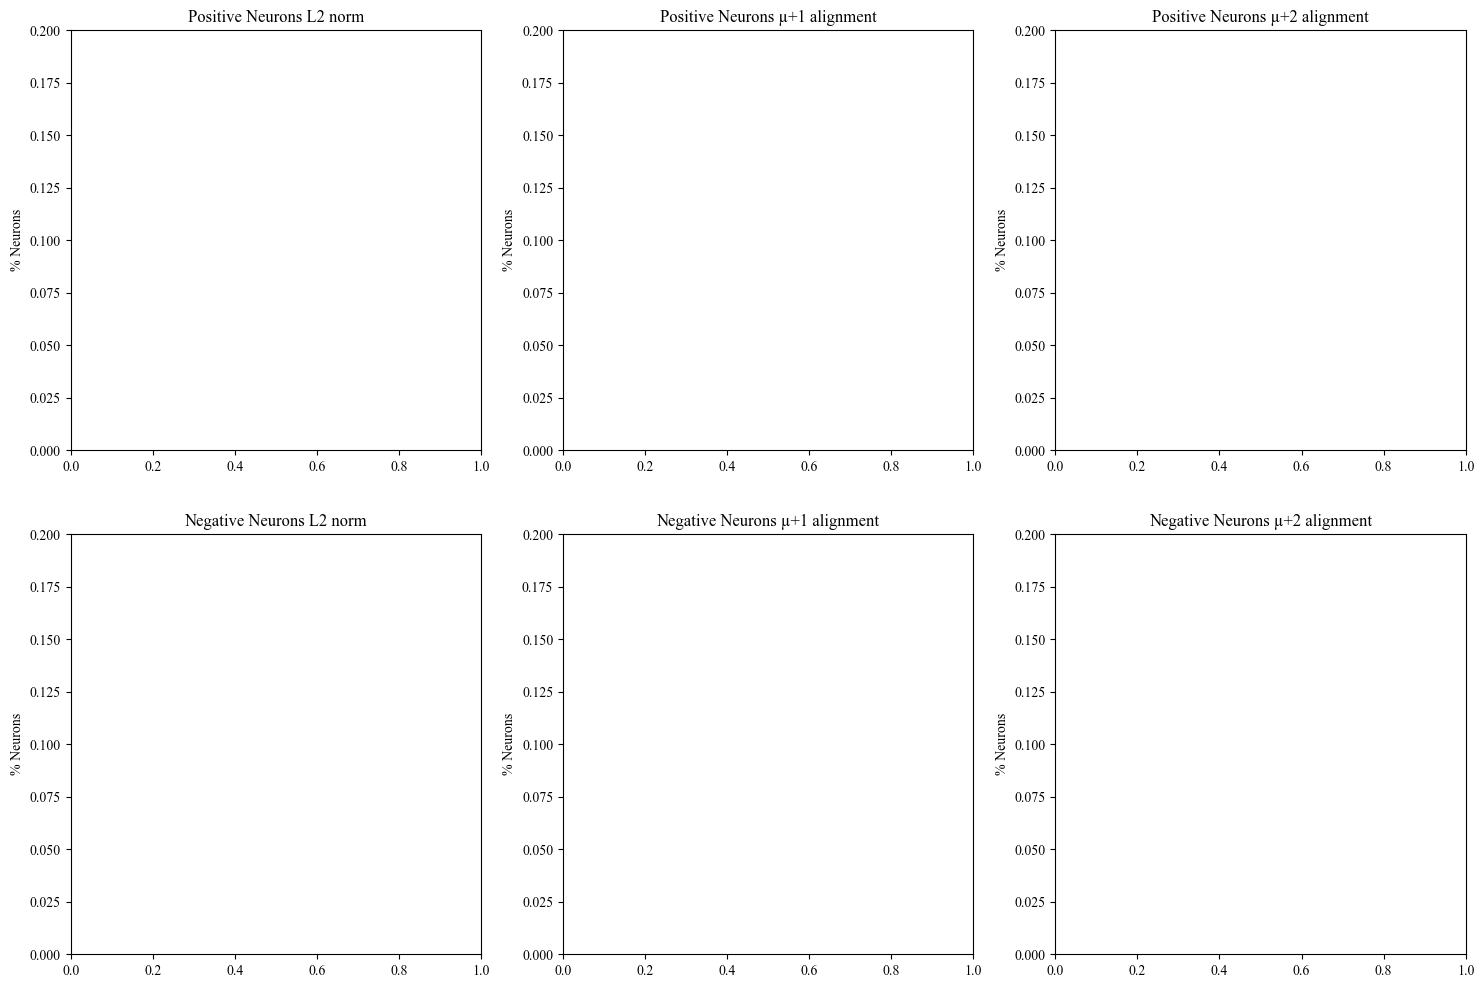

In [2]:
import numpy, torch, experiment

from settings.noisy_xor import get_dataloader
from utils.optimization import initialize
from plots import plot_samples_and_activation

initialize(seed=12345)

data = get_dataloader(
    noise_rate=0.15,
    within_cluster_variance=1. / 50.,
    input_dimension=2,
    sample_size=5000,
    batch_size=5000,
    rotation_matrix=numpy.identity(2),
)
_, (inputs, labels) = next(enumerate(data))

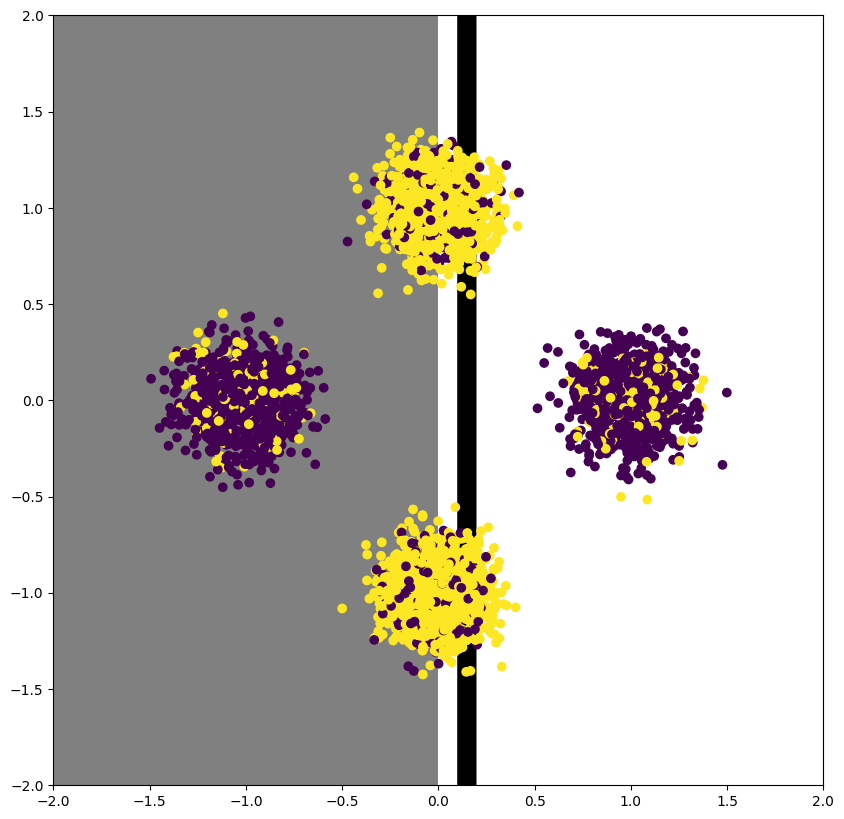

In [8]:
layers = [
    ([[1, 1, 1],
      [0, 0, 0]],
      [0, .1, .2]),
    [1, -2, 3]
]

def model(inputs):
    for layer in layers:
        weights = torch.Tensor(layer[0] if isinstance(layer, tuple) else layer)
        bias = torch.Tensor(layer[1] if isinstance(layer, tuple) else [0.])
        weights = weights / torch.norm(weights, dim=0)
        inputs = torch.matmul(inputs, weights)
        inputs = inputs if layer is layers[-1] else inputs * (inputs > bias)
        inputs = inputs if len(inputs.shape) > 1 else inputs.unsqueeze(1)

    return inputs

plot_samples_and_activation(inputs, labels, model, input_dimension=2)